In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('jojo_characters.csv', encoding='utf-8-sig')
df['Stand_lower'] = df['Stand'].str.lower()
df

,Parte,Personaje,Relación,Stand,Stand_lower
0,Battle Tendency,Joseph Joestar,Protagonista,NaN,NaN
1,Battle Tendency,Smokey Brown,Aliado,NaN,NaN
2,Battle Tendency,Erina Joestar,Aliado,NaN,NaN
3,Battle Tendency,Robert Edward O. Speedwagon,Aliado,NaN,NaN
4,Battle Tendency,Rudol Von Stroheim,Aliado (Antes Antagonista),NaN,NaN
...,...,...,...,...,...
225,Vento Aureo,Cioccolata,Antagonista,Green Day,green day
226,Vento Aureo,Secco,Antagonista,Oasis,oasis
227,Vento Aureo,Scolippi,Neutral,Rolling Stones,rolling stones
228,Vento Aureo,Jean Pierre Polnareff,Aliado,Silver Chariot - Chariot Requiem,silver chariot - chariot requiem


In [22]:
#Determinando estadísticas por Stand
stands = pd.read_csv('jojo_stands.csv', encoding='utf-8-sig')
# stands.to_csv('jojo_stands.csv', index=False, encoding='utf-8-sig')
stands['Stand_lower'] = stands['Stand'].str.lower()
stands.sort_values('Stand').tail(15)

,Stand,PWR,SPD,RNG,PER,PRC,DEV,Stand_lower
30,Tower of Gray,E,A,A,C,E,E,tower of gray
134,Tubular Bells,D,D,D,A,E,B,tubular bells
135,Tusk ACT1,E,E,D,B,E,A,tusk act1
136,Tusk ACT2,D,D,B,C,C,A,tusk act2
137,Tusk ACT3,D,D,B,D,C,A,tusk act3
138,Tusk ACT4,A,B,A,A,B,E,tusk act4
96,Under World,None,C,A,C,None,None,under world
148,Voodoo Child,B,A,E,E,B,B,voodoo child
114,Weather Report,A,B,C,A,E,A,weather report
31,Wheel of Fortune,B,D,D,A,E,D,wheel of fortune


In [19]:
stands[stands['Stand'].str.contains('Wonder')]

,Stand,PWR,SPD,RNG,PER,PRC,DEV,Stand_lower


In [5]:
#Merge -> Stand_lower
stats = df.merge(stands, on='Stand_lower', how='left').reset_index(drop=True)
stats.drop(columns=['Stand_lower','Stand_y'], inplace=True)
stats.rename(columns={'Stand_x':'Stand'}, inplace=True)
stats

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Battle Tendency,Joseph Joestar,Protagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Battle Tendency,Smokey Brown,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Battle Tendency,Erina Joestar,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Battle Tendency,Robert Edward O. Speedwagon,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Battle Tendency,Rudol Von Stroheim,Aliado (Antes Antagonista),NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
228,Vento Aureo,Cioccolata,Antagonista,Green Day,A,C,A,A,E,A
229,Vento Aureo,Secco,Antagonista,Oasis,A,A,B,A,E,C
230,Vento Aureo,Scolippi,Neutral,Rolling Stones,None,B,A,A,E,None
231,Vento Aureo,Jean Pierre Polnareff,Aliado,Silver Chariot - Chariot Requiem,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Metricas de Stand
dictionary = {'A':5, 'B':4, 'C':3, 'D': 2, 'E': 1, np.nan:0, None:0}

In [11]:
#Personajes Con Stands
characters_si_stands = stats.loc[(stats['Stand'].notnull())]
characters_si_stands = characters_si_stands.sort_values(['Parte','Personaje']).reset_index(drop=True)
characters_si_stands

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Diamond Is Unbreakable,Akira Otoishi,Antagonista,Red Hot Chili Pepper,A,A,A,A,C,A
1,Diamond Is Unbreakable,Anjuro Katagiri,Antagonista,Aqua Necklace,C,C,A,A,C,E
2,Diamond Is Unbreakable,Aya Tsuji,Aliado (Antes Neutral),Cinderella,D,C,C,C,A,C
3,Diamond Is Unbreakable,Bug-Eaten,Antagonista,Ratt,B,C,D,B,E,C
4,Diamond Is Unbreakable,Joseph Joestar,Aliado,Hermit Purple,D,C,D,A,D,E
...,...,...,...,...,...,...,...,...,...,...
163,Vento Aureo,Scolippi,Neutral,Rolling Stones,None,B,A,A,E,None
164,Vento Aureo,Secco,Antagonista,Oasis,A,A,B,A,E,C
165,Vento Aureo,Squalo,Antagonista,Clash,D,A,B,A,A,C
166,Vento Aureo,Tiziano,Antagonista,Talking Head,E,E,B,A,E,E


In [12]:
#Personajes Sin Stands
characters_no_stands = stats.loc[(stats['Stand'].isnull())]
characters_no_stands = characters_no_stands.sort_values(['Parte','Personaje']).reset_index(drop=True)
characters_no_stands

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Battle Tendency,Caesar Anthonio Zeppeli,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Battle Tendency,Donovan,Antagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Battle Tendency,Erina Joestar,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Battle Tendency,Esidisi,Antagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Battle Tendency,Joseph Joestar,Protagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
60,Stone Ocean,Loccobarocco,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Stone Ocean,Romeo Jisso,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Vento Aureo,Luca,Antagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Vento Aureo,Pericolo,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print("Cantidad de Personajes con merge de Stand exitoso:",
      len(characters_si_stands[characters_si_stands['DEV'].notnull()]))
print("Cantidad de Personajes con merge de Stand fallido:",
      len(characters_si_stands[characters_si_stands['DEV'].isnull()]))

Cantidad de Personajes con merge de Stand exitoso: 129
Cantidad de Personajes con merge de Stand fallido: 39


In [14]:
#Dio A traves del tiempo
stats[stats['Personaje'].str.contains('Dio|Diego')]

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
94,Phantom Blood,Dio Brando,Antagonista Principal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Stardust Crusaders,Dio,Antagonista Principal,The World,A,A,C,A,B,B
169,Steel Ball Run,Diego Brando,Neutral (Antes Antagonista),Scary Monsters (C/Ojo Izquierdo),NaN,NaN,NaN,NaN,NaN,NaN
170,Steel Ball Run,Diego Brando (2º),Antagonista,The World,A,A,C,A,B,B


In [15]:
#Datos de 'Jotaro Kujo' en diferentes partes
stats[stats['Personaje']=='Jotaro Kujo']

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
20,Diamond Is Unbreakable,Jotaro Kujo,Aliado,Star Platinum,A,A,C,A,A,A
21,Diamond Is Unbreakable,Jotaro Kujo,Aliado,Star Platinum,A,A,C,A,A,None
101,Stardust Crusaders,Jotaro Kujo,Protagonista Principal,Star Platinum,A,A,C,A,A,A
102,Stardust Crusaders,Jotaro Kujo,Protagonista Principal,Star Platinum,A,A,C,A,A,None
179,Stone Ocean,Jotaro Kujo,Aliado,Star Platinum,A,A,C,A,A,A
180,Stone Ocean,Jotaro Kujo,Aliado,Star Platinum,A,A,C,A,A,None
210,Vento Aureo,Jotaro Kujo,Aliado (De Koichi),Star Platinum (No Visto),NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Datos de 'Josuke Higashikata' en diferentes partes
stats[stats['Personaje']=='Josuke Higashikata']

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
16,Diamond Is Unbreakable,Josuke Higashikata,Protagonista,Crazy Diamond,A,A,D,B,B,C
50,Jojolion,Josuke Higashikata,Protagonista Principal,Soft & Wet,C,B,D,B,C,A


In [17]:
#Datos de los Villanos/Antagonistas
stats[stats['Relación']=='Antagonista Principal']

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
15,Battle Tendency,Kars,Antagonista Principal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Diamond Is Unbreakable,Yoshikage Kira,Antagonista Principal,Killer Queen,A,B,D,B,B,A
81,Jojolion,Tooru,Antagonista Principal,Wonder Of U,NaN,NaN,NaN,NaN,NaN,NaN
94,Phantom Blood,Dio Brando,Antagonista Principal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Stardust Crusaders,Dio,Antagonista Principal,The World,A,A,C,A,B,B
171,Steel Ball Run,Funny Valentine,Antagonista Principal,D4C,NaN,NaN,NaN,NaN,NaN,NaN
201,Stone Ocean,Enrico Pucci,Antagonista Principal,Whitesnake - C-Moon - Made In Heaven,NaN,NaN,NaN,NaN,NaN,NaN
232,Vento Aureo,Diavolo/Vinegar Doppio,Antagonista Principal,King Crimson/Epitaph,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Datos de los Protagonistas en general
stats[stats['Relación'].str.contains('Protagonista')]

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Battle Tendency,Joseph Joestar,Protagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Diamond Is Unbreakable,Josuke Higashikata,Protagonista,Crazy Diamond,A,A,D,B,B,C
50,Jojolion,Josuke Higashikata,Protagonista Principal,Soft & Wet,C,B,D,B,C,A
82,Phantom Blood,Jonathan Joestar,Protagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Stardust Crusaders,Jotaro Kujo,Protagonista Principal,Star Platinum,A,A,C,A,A,A
102,Stardust Crusaders,Jotaro Kujo,Protagonista Principal,Star Platinum,A,A,C,A,A,None
141,Steel Ball Run,Johnny Joestar,Deuteragonista (Pasa A Protagonista),"Tusk (Act 1 , 2 , 3 & 4)",NaN,NaN,NaN,NaN,NaN,NaN
142,Steel Ball Run,Gyro Zeppeli,Protagonista (Pasa A Deuteragonista),Scan (C/Ojo Izquierdo)---- Ball Breaker,NaN,NaN,NaN,NaN,NaN,NaN
176,Stone Ocean,Jolyne Cujoh,Protagonista Principal,Stone Free,A,B,C,A,C,A
202,Vento Aureo,Giorno Giovanna,Protagonista,Gold Experience - Gold Experience Requiem,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cantida de Personajes por Parte [1-8]'}>

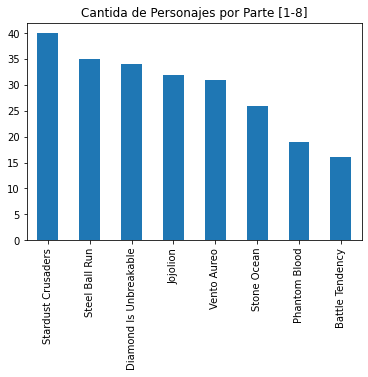

In [13]:
#Cantidad de personajes por partes
stats['Parte'].value_counts().plot(kind='bar', 
                                        title='Cantida de Personajes por Parte [1-8]')

In [14]:
#Personajes que perduran en el tiempo o sus nombres hacen referencia a nuevos personajes
stats[stats.duplicated(['Personaje'], keep=False)].sort_values('Personaje')

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV
231,Vento Aureo,Jean Pierre Polnareff,Aliado,Silver Chariot - Chariot Requiem,NaN,NaN,NaN,NaN,NaN,NaN
106,Stardust Crusaders,Jean Pierre Polnareff,Aliado (Antes Antagonista),Silver Chariot,C,A,C,B,B,C
141,Steel Ball Run,Johnny Joestar,Deuteragonista (Pasa A Protagonista),"Tusk (Act 1 , 2 , 3 & 4)",NaN,NaN,NaN,NaN,NaN,NaN
66,Jojolion,Johnny Joestar,Neutral,Tusk,NaN,NaN,NaN,NaN,NaN,NaN
0,Battle Tendency,Joseph Joestar,Protagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Diamond Is Unbreakable,Joseph Joestar,Aliado,Hermit Purple,D,C,D,A,D,E
103,Stardust Crusaders,Joseph Joestar,Aliado,Hermit Purple,D,C,D,A,D,E
50,Jojolion,Josuke Higashikata,Protagonista Principal,Soft & Wet,C,B,D,B,C,A
16,Diamond Is Unbreakable,Josuke Higashikata,Protagonista,Crazy Diamond,A,A,D,B,B,C
180,Stone Ocean,Jotaro Kujo,Aliado,Star Platinum,A,A,C,A,A,None


In [29]:
for i in stats.iloc[:, 4:].columns:
    stats[f"number_{i}"] = stats[i].map(dictionary)

In [32]:
stats

,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV,number_PWR,number_SPD,number_RNG,number_PER,number_PRC,number_DEV
0,Battle Tendency,Joseph Joestar,Protagonista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,Battle Tendency,Smokey Brown,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,Battle Tendency,Erina Joestar,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,Battle Tendency,Robert Edward O. Speedwagon,Aliado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,Battle Tendency,Rudol Von Stroheim,Aliado (Antes Antagonista),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Vento Aureo,Cioccolata,Antagonista,Green Day,A,C,A,A,E,A,5.0,3.0,5.0,5.0,1.0,5.0
229,Vento Aureo,Secco,Antagonista,Oasis,A,A,B,A,E,C,5.0,5.0,4.0,5.0,1.0,3.0
230,Vento Aureo,Scolippi,Neutral,Rolling Stones,None,B,A,A,E,None,NaN,4.0,5.0,5.0,1.0,NaN
231,Vento Aureo,Jean Pierre Polnareff,Aliado,Silver Chariot - Chariot Requiem,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


,Parte,Personaje,Relación,Stand,PWR,SPD,RNG,PER,PRC,DEV,number_PWR,number_SPD,number_RNG,number_PER,number_PRC,number_DEV
0,Stardust Crusaders,Jean Pierre Polnareff,Aliado (Antes Antagonista),Silver Chariot,C,A,C,B,B,C,3.0,5.0,3.0,4.0,4.0,3.0


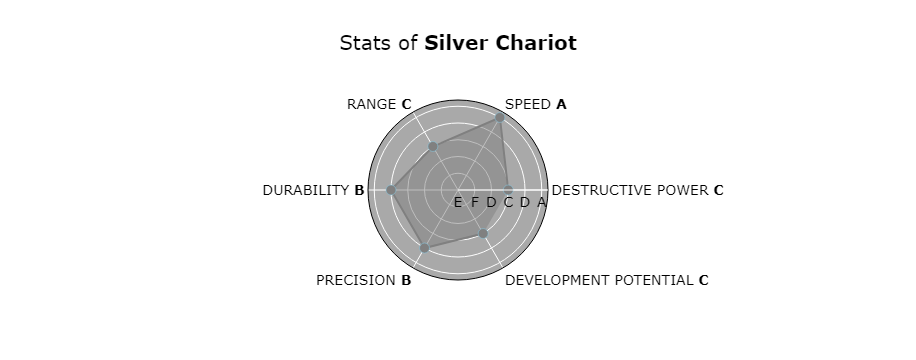

In [79]:
STAND = 'Silver Chariot'
x = stats[stats["Stand"] == STAND].reset_index(drop=True)
display(pd.DataFrame(x.iloc[0]).T)
data = [go.Scatterpolar(
    r=[x['number_PWR'].values[0], x['number_SPD'].values[0], x['number_RNG'].values[0],
        x['number_PER'].values[0], x['number_PRC'].values[0], x['number_DEV'].values[0]],
    theta=['DESTRUCTIVE POWER <b>{}<b>'.format(x['PWR'].values[0]), 'SPEED <b>{}<b>'.format(x['SPD'].values[0]), 'RANGE <b>{}<b>'.format(
        x['RNG'].values[0]), 'DURABILITY <b>{}<b>'.format(x['PER'].values[0]), 'PRECISION <b>{}<b>'.format(x['PRC'].values[0]), 'DEVELOPMENT POTENTIAL <b>{}<b>'.format(x['DEV'].values[0])],
    fill='toself',
    # fillcolor="lightblue",
    marker=dict(symbol=0,
                size=10,
                color='grey',
                line=dict(
                    color='skyblue',
                    width=0.5
                ))
)]

layout = go.Layout(
    polar=dict(radialaxis=dict(gridcolor="white",
                               tickmode='array',
                               tickvals=['0', '1', '2', '3', '4', '5'],
                               ticktext=['F', 'E', 'D', 'C', 'B', 'A']),

               angularaxis_linecolor='black',
               bgcolor='darkgrey'),
    title="Stats of <b>{}<b>".format(x.Stand.values[0])
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(title_x=0.5, font=dict(
    family="Verdana", size=14), font_color="#000000")
iplot(fig)
